# SymPy (Mr. P Solver)

Video Link: https://youtu.be/1yBPEPhq54M

Codes: https://www.youtube.com/redirect?event=video_description&redir_token=QUFFLUhqbFpXWXFuczlGOVZ4RFllbHV0eko2T29jUEw1UXxBQ3Jtc0tsdjAtNnZ1b2lkY0Z1Nnd4WG1FLVdaWEJiSE4yWFNWLTFkQkRDQWRiSmNzWDdPWDZDWnZBeXNIX0FybWJ1VV9FQVREUk5mODlmbU9VWFdSUkxwT1N1cUhtMmZ3eWtrWkRpdWYtTEZkMXdGZUZSMHFKdw&q=https%3A%2F%2Fgithub.com%2Flukepolson%2Fyoutube_channel%2Fblob%2Fmain%2FPython%2520Tutorial%2520Series%2Fsympy1.ipynb&v=1yBPEPhq54M

SymPy means SYMBOLIC PYTHON.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as smp

## Introduction

Symbols can be defined as follows

In [2]:
x = smp.symbols('x')

In [3]:
x**2 - 5*x + 6

x**2 - 5*x + 6

In [4]:
y = smp.sin(x)
y**2 + (smp.cos(x))**2

sin(x)**2 + cos(x)**2

In [5]:
y1 = smp.log(x,10)  # input the base
y1

log(x)/log(10)

type **'smp.'** and press **'Tab'** to see all the SymPy functions 

In [6]:
z = (x**2 - 5*x + 6)**2
display(z.factor(), z.expand())
display(smp.solve(z,x))

(x - 3)**2*(x - 2)**2

x**4 - 10*x**3 + 37*x**2 - 60*x + 36

[2, 3]

In [7]:
z.as_poly()

Poly(x**4 - 10*x**3 + 37*x**2 - 60*x + 36, x, domain='ZZ')

type **'z.'** and press **'Tab'** to see all the operations that can be done on z

In [8]:
z.fourier_series([-smp.pi, smp.pi])

FourierSeries((x**2 - 5*x + 6)**2, (x, -pi, pi), ((2*pi**5/5 + 72*pi + 74*pi**3/3)/(2*pi), SeqFormula(Piecewise((72*sin(_n*pi)/_n + 2*pi**4*sin(_n*pi)/_n + 74*pi**2*sin(_n*pi)/_n + 8*pi**3*cos(_n*pi)/_n**2 + 148*pi*cos(_n*pi)/_n**2 - 24*pi**2*sin(_n*pi)/_n**3 - 148*sin(_n*pi)/_n**3 - 48*pi*cos(_n*pi)/_n**4 + 48*sin(_n*pi)/_n**5, (_n > -oo) & (_n < oo) & Ne(_n, 0)), (2*pi**5/5 + 72*pi + 74*pi**3/3, True))*cos(_n*x)/pi, (_n, 1, oo)), SeqFormula(Piecewise((120*pi*cos(_n*pi)/_n + 20*pi**3*cos(_n*pi)/_n - 60*pi**2*sin(_n*pi)/_n**2 - 120*sin(_n*pi)/_n**2 - 120*pi*cos(_n*pi)/_n**3 + 120*sin(_n*pi)/_n**4, (_n > -oo) & (_n < oo) & Ne(_n, 0)), (0, True))*sin(_n*x)/pi, (_n, 1, oo))))

In [9]:
z1 = smp.exp(x) + smp.exp(-x)
display(z1)
display(smp.solve(z1))

exp(x) + exp(-x)

[-I*pi/2, I*pi/2]

In [10]:
x = smp.symbols('x', real=True, positive=True)
smp.solve(x**4 - 16, x)

[2]

Can define many variables at once

In [11]:
x, y, z = smp.symbols('x y z')
f = x**3*smp.sin(z) - y**2*smp.exp(z)
f

x**3*sin(z) - y**2*exp(z)

In [12]:
y_soln = smp.solve(f, y)
y_soln

[-sqrt(x**3*exp(-z)*sin(z)), sqrt(x**3*exp(-z)*sin(z))]

In [13]:
smp.solve(f,x)

[(y**2*exp(z)/sin(z))**(1/3),
 -(y**2*exp(z)/sin(z))**(1/3)/2 - sqrt(3)*I*(y**2*exp(z)/sin(z))**(1/3)/2,
 -(y**2*exp(z)/sin(z))**(1/3)/2 + sqrt(3)*I*(y**2*exp(z)/sin(z))**(1/3)/2]

For multivariable expressions, can also substitute values in

In [14]:
f.subs([(y,smp.sqrt(x)), (z,smp.pi/2)])

x**3 - x*exp(pi/2)

**SymPy to NumPy conversion so that the function can be plotted.**

In [15]:
f1sym = y_soln[1]
f1sym

sqrt(x**3*exp(-z)*sin(z))

In [16]:
f1num = smp.lambdify([x,z], f1sym)
f1num(4,np.pi/2)

3.64750502212797

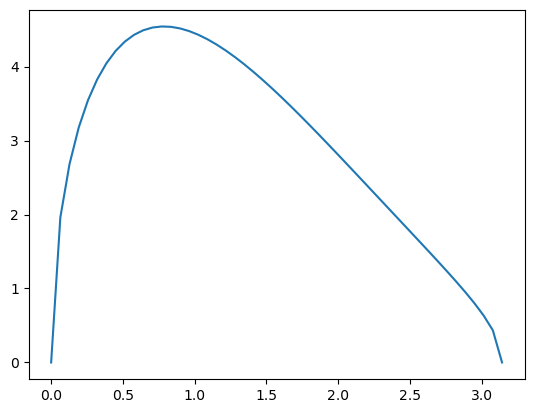

In [17]:
xnum = 4
ynum = np.linspace(0,np.pi,50)
plt.plot(ynum, f1num(xnum, ynum))

## Example

A falling object encounters a moving platform accelerating upwards:
1. Object $ h_o(t) = h_0 - v_o t - \frac{1}{2}gt^2 $
2. Platform $ h_p(t) = v_p t + \frac{1}{2} q t^2 $

Find the initial velocity $v_0$ such that when the object and platform collide, they are moving at the same speed.

**Soln:** We need to solve for $v_0$ and $t$ in the 2 eqns:
1. $ h_0(t) = h_p(t) $ and
2. $ \frac{dh_0}{dt}(t) = -\frac{dh_p}{dt}(t) $

from these 2 equations we can define 2 functions eq1 and eq2

In [18]:
t, h0, v0, g, vp, q = smp.symbols('t h_0 v_0 g v_p q', 
                                  real=True, positive=True)

h0t = h0 - v0*t - smp.Rational(1,2)*g*t**2
hpt = vp*t + smp.Rational(1,2)*q*t**2
dh0dt = -v0 + g*t
dhpdt = vp + q*t

eq1 = h0t - hpt
eq2 = dh0dt + dhpdt

sol = smp.solve([eq1,eq2], [v0,t])
display(sol)

[(v_p + (g + q)*(-2*v_p/(3*(g + q)) + sqrt(2)*sqrt(3*g*h_0 + 3*h_0*q + 2*v_p**2)/(3*(g + q))),
  -2*v_p/(3*(g + q)) + sqrt(2)*sqrt(3*g*h_0 + 3*h_0*q + 2*v_p**2)/(3*(g + q)))]

In [19]:
v_initial, t_collision = sol[0]
v_initial

v_p + (g + q)*(-2*v_p/(3*(g + q)) + sqrt(2)*sqrt(3*g*h_0 + 3*h_0*q + 2*v_p**2)/(3*(g + q)))

velocities at the time of collision

In [20]:
dh0dt.subs([(v0, v_initial), (t,t_collision)]).simplify()

(-g*v_p - q*v_p/3 - q*sqrt(6*g*h_0 + 6*h_0*q + 4*v_p**2)/3)/(g + q)

In [21]:
dhpdt.subs([(v0, v_initial), (t,t_collision)]).simplify()

(g*v_p + q*v_p/3 + q*sqrt(6*g*h_0 + 6*h_0*q + 4*v_p**2)/3)/(g + q)

## Calculus (1st year)

More depth discussion here: https://www.youtube.com/watch?v=-SdIZHPuW9o

In [22]:
x = smp.symbols('x')

### Limits

$$ \lim_{x \to \pi} \sin(x/2+ \sin(x)) $$

In [23]:
smp.limit(smp.sin(x/2 + smp.sin(x)), x, smp.pi)

1

### Derivatives

$$ \frac{d}{dx} \left(\frac{1+sinx}{1-cosx} \right)^2 $$

In [24]:
smp.diff(((1+smp.sin(x))/(1-smp.cos(x)))**2, x)

2*(sin(x) + 1)*cos(x)/(1 - cos(x))**2 - 2*(sin(x) + 1)**2*sin(x)/(1 - cos(x))**3

$$ \frac{d}{dx} f(x+g(x)) $$

In [25]:
f,g = smp.symbols('f g', cls=smp.Function)

g = g(x)
f = f(x+g)
display(f)

dfdx = smp.diff(f,x)
dfdx

f(x + g(x))

(Derivative(g(x), x) + 1)*Subs(Derivative(f(_xi_1), _xi_1), _xi_1, x + g(x))

In [26]:
dfdx.subs(g, smp.sin(x)).doit()  # doit() performs the derivative

(cos(x) + 1)*Subs(Derivative(f(_xi_1), _xi_1), _xi_1, x + sin(x))

### Integrations

**Indefinite Integrals**
(Integration constant is not added)

$$ \int \csc(x) \cot (x)  dx $$

In [27]:
smp.integrate(smp.csc(x)*smp.cot(x), x)

-1/sin(x)

**Definite Integrals**

$$ \int_{0}^{\ln(4)}\frac{e^x dt}{\sqrt{e^{2x}+9}} $$

In [28]:
smp.integrate(smp.exp(x)/smp.sqrt(smp.exp(2*x) + 9), (x, 0, smp.log(4)))

-asinh(1/3) + asinh(4/3)

$$ \int_1^t x^{10} e^x dx $$

In [29]:
t = smp.symbols('t')
smp.integrate(x**10*smp.exp(x), (x,1,t))

(t**10 - 10*t**9 + 90*t**8 - 720*t**7 + 5040*t**6 - 30240*t**5 + 151200*t**4 - 604800*t**3 + 1814400*t**2 - 3628800*t + 3628800)*exp(t) - 1334961*E

## Examples

The hydrogen wave function is given by $$ \psi_{nlm} = R_{nl}(r)Y_l^m(\theta, \phi) $$ where
$$ R_{nl}(r) =  \sqrt{\left(\frac{2}{na}\right)^3 \frac{(n-l-1)!}{2n[(n+l)!]}} e^{-r/na} \left(\frac{2r}{na}\right)^l \left[L_{n-l-1}^{2l+1}(2r/na)\right] $$

Calculate:

The mean distance from the nucleus of the electron: $$ \left<r\right> = \int R_{nl}^2 r^3 dr $$
The standard deviation in the distance from the nucleus of the electron:
$$ \sigma = \sqrt{\left<r^2\right> - \left<r\right>^2} =  \sqrt{\left(\int_{0}^{\infty}R_{nl}^2 r^4 dr\right) - \left(\int_{0}^{\infty} R_{nl}^2 r^3 dr\right)^2} $$

### Solution:

In [30]:
from sympy import assoc_laguerre

Define variables

In [31]:
r, a = smp.symbols('r a', real=True, positive=True)
n, l = smp.symbols('n l', integer=True, positive=True)

define $ R_{nl}(r) $

In [32]:
R = smp.sqrt((2/(n*a))**3 * smp.factorial(n-l-1) / (2*n*smp.factorial(n+l))) * smp.exp(-r/(n*a)) \
*(2*r/(n*a))**l * assoc_laguerre((n-l-1), (2*l+1), (2*r/(n*a)))
R

2*(2*r/(a*n))**l*exp(-r/(a*n))*assoc_laguerre(-l + n - 1, 2*l + 1, 2*r/(a*n))*sqrt(factorial(-l + n - 1))/(a**(3/2)*n**2*sqrt(factorial(l + n)))

ground state function

In [33]:
R_10 = R.subs([(n,1),(l,0)])
R_10

2*exp(-r/a)/a**(3/2)

Function to compute $ \int_{0}^{\infty} R_{nl}^2 r^k dr $ for  particular values of $n,l$ and $k$,

In [34]:
def comp_int(n1,l1,k):
    Rn1l1 = R.subs([(n,n1),(l,l1)])
    return smp.integrate(Rn1l1**2 * r**k, (r,0, smp.oo))

Average r

In [35]:
r10avg = comp_int(1,0,3)  # ground state
r10avg

3*a/2

In [36]:
r53avg = comp_int(n1=5,l1=3,k=3)
r53avg

63*a/2

In [37]:
sigma10 = smp.sqrt(comp_int(1,0,4) - (comp_int(1,0,3))**2)
sigma10   # ground state

sqrt(3)*a/2

In [38]:
sigma64 = smp.sqrt(comp_int(6,4,4) - (comp_int(6,4,3))**2)
sigma64

11*sqrt(2)*a

Graphs

In [39]:
def meandist(n1,l1=0):
    expr = comp_int(n1,l1,k=3)
    expr_f = smp.lambdify([a], expr)
    return expr_f(1)  # taking a=1

In [40]:
meandist(1)

1.5

In [41]:
n2 = np.arange(1,10)
dist = [meandist(ni) for ni in n2]

Text(0, 0.5, '$< r >$')

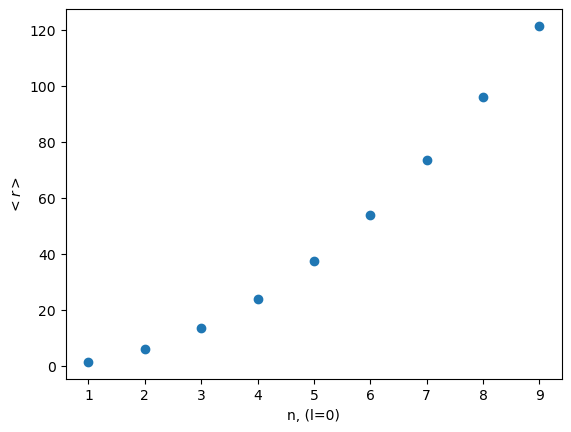

In [42]:
plt.scatter(n2,dist)
plt.xlabel('n, (l=0)')
plt.ylabel('$< r >$')

## Multivariable Calculus

In [43]:
x,y,z,t,u1,u2,u3,v1,v2,v3 = smp.symbols('x y z t u_1 u_2 u_3 v_1 v_2 v_3')

### Vectors and Geometry

In [44]:
u = smp.Matrix([u1,u2,u3])
v = smp.Matrix([v1,v2,v3])

**Matrix Operations**

In [45]:
5*u - 2*v

Matrix([
[5*u_1 - 2*v_1],
[5*u_2 - 2*v_2],
[5*u_3 - 2*v_3]])

In [46]:
u.dot(v)

u_1*v_1 + u_2*v_2 + u_3*v_3

In [47]:
u.cross(v)

Matrix([
[ u_2*v_3 - u_3*v_2],
[-u_1*v_3 + u_3*v_1],
[ u_1*v_2 - u_2*v_1]])

In [48]:
u.norm()

sqrt(Abs(u_1)**2 + Abs(u_2)**2 + Abs(u_3)**2)

Projection  - (See the 2nd year calculus notes)

Lines: $ \vec{r}(t) = \vec{r}_0 + t\vec{v} $

In [49]:
r0 = smp.Matrix([1,1,1])
v = smp.Matrix([4,3,4])
r = r0 + t*v
r

Matrix([
[4*t + 1],
[3*t + 1],
[4*t + 1]])

Planes: $ \vec{n} \cdot (P_0-\left<x,y,z\right>) = 0 $

In [50]:
n = smp.Matrix([3,2,3])
P0 = smp.Matrix([2.2,3,2])
r = smp.Matrix([x,y,z])
n.dot(P0 - r)

-3*x - 2*y - 3*z + 18.6

## Vector Calculus

### Vector derivatives

In [51]:
r = smp.Matrix([4*t,6*smp.cos(5*t),t**3])
smp.diff(r,t)

Matrix([
[           4],
[-30*sin(5*t)],
[      3*t**2]])

**Example:** Find the angle between the velocity and acceleration as a function of time $\theta(t)$ and also find the angle at $t=8s$.

In [52]:
v = smp.diff(r,t)
a = smp.diff(v,t)
theta = smp.acos(v.dot(a)/(v.norm()*a.norm()))
theta.simplify()

acos(3*(t**3 + 125*sin(10*t))/(sqrt(Abs(t)**2 + 625*Abs(cos(5*t))**2)*sqrt(9*Abs(t**2)**2 + 900*Abs(sin(5*t))**2 + 16)))

In [53]:
theta.subs(t,8).evalf()  # eval() evaluates a float value

1.23941092042577

### Vector Integrals

In [54]:
r = smp.Matrix([smp.exp(-t**3), smp.sin(t), 5*t**3 + 4*t])
I = smp.Integral(r,t)
I

Integral(Matrix([
[  exp(-t**3)],
[      sin(t)],
[5*t**3 + 4*t]]), t)

In [55]:
I.doit()  # performs the integration

Matrix([
[gamma(1/3)*lowergamma(1/3, t**3)/(9*gamma(4/3))],
[                                        -cos(t)],
[                              5*t**4/4 + 2*t**2]])

Some cases integrals can't be solved analytically. So we need to solve them numerically.

In [56]:
from scipy.integrate import quad_vec

In [57]:
r1 = smp.Matrix([smp.exp(-t**2)*smp.cos(t)**3, smp.exp(-t**4), 1/(3+t**2)])
I1 = smp.Integral(r1, (t,0,1))
I1

Integral(Matrix([
[exp(-t**2)*cos(t)**3],
[          exp(-t**4)],
[        1/(t**2 + 3)]]), (t, 0, 1))

In [58]:
rf = smp.lambdify([t],r1)
rf(1)

array([[0.05802511],
       [0.36787944],
       [0.25      ]])

In [59]:
quad_vec(rf, 0,1)  # integration and error

(array([[0.53525785],
        [0.84483859],
        [0.30229989]]),
 3.5151979041265046e-14)

Result: (high processing time)
$$ \displaystyle \left[\begin{matrix}\int e^{- t^{2}} \cos^{3}{\left(t \right)}\, dt\\\frac{\Gamma\left(\frac{1}{4}\right) \gamma\left(\frac{1}{4}, t^{4}\right)}{16 \Gamma\left(\frac{5}{4}\right)}\\\frac{\sqrt{3} \operatorname{atan}{\left(\frac{\sqrt{3} t}{3} \right)}}{3}\end{matrix}\right] $$

### Arclength

$$ L = \int_a^b \sqrt{dx^2 + dy^2 + dz^2} = \int_a^b \sqrt{(dx/dt)^2 + (dy/dt)^2 + (dz/dt)^2 } dt $$

Find arclength of $ \left< 0, 3t, 2t^2 \right> $ from $t=0$ to $t=1$.

In [60]:
r2= smp.Matrix([0, 3*t, 2*t**2])
display(r2)

f1 = smp.diff(r2,t).norm()
L= smp.integrate(f1, (t,0,1))
display(L)

Matrix([
[     0],
[   3*t],
[2*t**2]])

9*asinh(4/3)/8 + 5/2

### Biot-Savart Law

The magnetic field at a point $\vec{r}$ of a current configuration is
$$ \vec{B}(\vec{r}) = \frac{\mu_0}{4\pi} \int_t \frac{I \frac{d\vec{\ell}}{dt} \times (\vec{r}-\vec{\ell})}{|\vec{r}-\vec{\ell}|^3} dt $$

Where $\vec{r} = (x,y,z)$ and $\vec{\ell} = (f(t), g(t), h(t))$ is a 1D curve in space that gives location of the wire. (Here, t is a parameter, not time.)

**Writing General Formulae**

In [61]:
x,y,z,t,I, mu0 = smp.symbols('x y z t I \mu_0', real= True)
f,g,h = smp.symbols('f g h', cls= smp.Function)
f = f(t)
g = g(t)
h = h(t)

In [62]:
r = smp.Matrix([x, y, z])
l = smp.Matrix([f, g, h])
dldt = smp.diff(l)

In [63]:
l

Matrix([
[f(t)],
[g(t)],
[h(t)]])

In [64]:
dBdt = (mu0* I/(4*smp.pi))* dldt.cross(r-l)/ ((r-l).norm())**3
dBdt

Matrix([
[I*\mu_0*(-(y - g(t))*Derivative(h(t), t) + (z - h(t))*Derivative(g(t), t))/(4*pi*(Abs(x - f(t))**2 + Abs(y - g(t))**2 + Abs(z - h(t))**2)**(3/2))],
[ I*\mu_0*((x - f(t))*Derivative(h(t), t) - (z - h(t))*Derivative(f(t), t))/(4*pi*(Abs(x - f(t))**2 + Abs(y - g(t))**2 + Abs(z - h(t))**2)**(3/2))],
[I*\mu_0*(-(x - f(t))*Derivative(g(t), t) + (y - g(t))*Derivative(f(t), t))/(4*pi*(Abs(x - f(t))**2 + Abs(y - g(t))**2 + Abs(z - h(t))**2)**(3/2))]])

**Question:** Find magnetic field at a distance $H$ above a ring of radius $R$ flowing clockwise.

In [65]:
H, R = smp.symbols('H R', real = True)

In [66]:
dBdt1 = dBdt.subs([(f, R*smp.cos(t)), (g, R*smp.sin(t)), (h, 0),
                 (x,0), (y,0), (z,H)]).doit()
dBdt1.simplify()
dBdt1

Matrix([
[H*I*R*\mu_0*cos(t)/(4*pi*(H**2 + R**2)**(3/2))],
[H*I*R*\mu_0*sin(t)/(4*pi*(H**2 + R**2)**(3/2))],
[      I*R**2*\mu_0/(4*pi*(H**2 + R**2)**(3/2))]])

In [67]:
B1 = smp.integrate(dBdt1, [t, 0, 2*smp.pi])
B1

Matrix([
[                                    0],
[                                    0],
[I*R**2*\mu_0/(2*(H**2 + R**2)**(3/2))]])

**Question:** Find magnetic field at a distance $\rho$ from a wire of length $L$ kept at the $z$ axis.

In [68]:
L, rho, th = smp.symbols('L \\rho \\theta', real = True)

In [69]:
dBdt2 = dBdt.subs([(f, 0), (g, 0), (h, t), 
                   (x, rho* smp.cos(th)), (y, rho* smp.sin(th)), (z,0)]).doit()
dBdt2.simplify()
dBdt2

Matrix([
[-I*\mu_0*\rho*sin(\theta)/(4*pi*(\rho**2 + t**2)**(3/2))],
[ I*\mu_0*\rho*cos(\theta)/(4*pi*(\rho**2 + t**2)**(3/2))],
[                                                       0]])

In [70]:
B2 = smp.integrate(dBdt2, [t, -L/2, L/2])
B2

Matrix([
[-I*L*\mu_0*sin(\theta)/(4*pi*\rho**2*sqrt(L**2/(4*\rho**2) + 1))],
[ I*L*\mu_0*cos(\theta)/(4*pi*\rho**2*sqrt(L**2/(4*\rho**2) + 1))],
[                                                               0]])

## Partial/Directional Derivatives

In [71]:
x, y, z = smp.symbols('x y z')

Partial derivatives $\frac{\partial f}{\partial x}$, $\frac{\partial f}{\partial y}$ and $\frac{\partial^3 f}{\partial xy^2}$ of $ f(x,y)=y^2\sin(x+y) $

In [72]:
fxy = y**2 * smp.sin(x+y)

In [73]:
smp.diff(fxy, x)

y**2*cos(x + y)

In [74]:
smp.diff(fxy, y)

y**2*cos(x + y) + 2*y*sin(x + y)

In [75]:
smp.diff(fxy, y, y, x)

-y**2*cos(x + y) - 4*y*sin(x + y) + 2*cos(x + y)

**The Chain Rule**

Suppose $x$,$y$ and $z$ are functions of $t$ and $w= w(x,y,z)$. Find $dw/dt$.

In [76]:
t = smp.symbols('t')
x, y, z, w = smp.symbols('x y z w', cls = smp.Function)
x = x(t)
y = y(t)
z = z(t)
w = w(x,y,z)
w

w(x(t), y(t), z(t))

In [77]:
smp.diff(w,t)

Derivative(w(x(t), y(t), z(t)), x(t))*Derivative(x(t), t) + Derivative(w(x(t), y(t), z(t)), y(t))*Derivative(y(t), t) + Derivative(w(x(t), y(t), z(t)), z(t))*Derivative(z(t), t)

In [78]:
w1 = x* smp.sin(y)* smp.exp(-z**2)
smp.diff(w1,t)

-2*x(t)*z(t)*exp(-z(t)**2)*sin(y(t))*Derivative(z(t), t) + x(t)*exp(-z(t)**2)*cos(y(t))*Derivative(y(t), t) + exp(-z(t)**2)*sin(y(t))*Derivative(x(t), t)

In [79]:
smp.diff(w1,t).subs([(x, 1/t**2), (y,14*t), (z, 2*t)]).doit()

-8*exp(-4*t**2)*sin(14*t)/t + 14*exp(-4*t**2)*cos(14*t)/t**2 - 2*exp(-4*t**2)*sin(14*t)/t**3

## Multiple Integrals

In rare cases it can be solved symbolically.

$$ \int_0^1 \int_0^{1-x^2} \int_3^{4-x^2-y^2} x^3dzdydx $$

In [80]:
x, y, z = smp.symbols('x y z')
f1 = x**3
smp.integrate(f1, (z,3, 4-x**2-y**2), (y,0,1-x**2), (x,0,1))

1/30

## Lagrangian Mechanics